In [1]:
# from mlxtend.data import loadlocal_mnist
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

# tf.compat.v1.keras.backend

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

%matplotlib inline

In [ ]:
# x_train, y_train = (loadlocal_mnist(
#     images_path='data/train-images.idx3-ubyte',
#     labels_path='data/train-labels.idx1-ubyte'
# ))
#
# x_train = np.asarray(x_train)
# y_train = np.asarray(y_train)
# print(
#     'Dimensions\n',
#     x_train.shape[0], x_train.shape[1]
# )
#
# print(
#     'First Row =>', x_train[0]
# )

In [ ]:
# print(np.unique(y_train))
#
# print('Digit Distribution:\n', np.bincount(y_train))

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# print(
#     'Dimensions:\n',
#     x_train.shape[0], x_train.shape[1]
# )

In [3]:
print(train.info())

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


Optimize memory usage

In [4]:
y_train = np.asarray(train.iloc[:, 0].values.astype('int32'))
x_train = np.asarray(train.iloc[:, 1:].values.astype('float32'))

x_test = np.asarray(test.values.astype('float32'))

In [5]:
print(x_train, len(x_train))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 42000


Data needs to be reshaped from (784,) to 28*28

In [6]:
image_idx = np.random.randint(len(train), size=10)
x_train_reshaped = []

print(y_train[image_idx])

for i in range(len(x_train)):
    x_train_reshaped.append(x_train[i].reshape(28, 28))

x_train_reshaped = np.asarray(x_train_reshaped)

[2 2 7 9 0 5 3 5 0 1]


(42000, 28, 28)

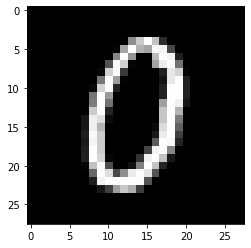

In [7]:


# maps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
#         'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
#         'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r',
#         'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples',
#         'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r',
#         'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia',
#         'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot',
#         'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r',
#         'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix',
#         'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat',
#         'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r',
#         'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r',
#         'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r',
#         'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
#         'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r',
#         'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight',
#         'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
# #
# for map in maps:
#     plt.imsave(
#         f'{map}.png',
#         arr=x_train_reshaped[image_idx[1]],
#         cmap=map
#     )
plt.imshow(x_train_reshaped[5], cmap='gist_gray')

# x_train_reshaped = np.array(x_train_reshaped)
x_train_reshaped.shape

(28000, 28, 28)

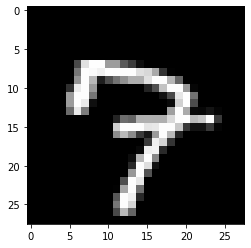

In [8]:
x_test_reshaped = []
for i in range(len(x_test)):
    x_test_reshaped.append(x_test[i].reshape(28, 28))



plt.imshow(x_test_reshaped[5], cmap='gist_gray')

x_test_reshaped = np.asarray(x_test_reshaped)
x_test_reshaped.shape

In [9]:
print(type(x_train_reshaped
           ))

<class 'numpy.ndarray'>


- Array must be reshaped to 4d to work with keras.
- Reshape from (42000, 28, 28) to (42000, 28, 28, 1)

In [10]:
x_train_update = np.asarray(x_train_reshaped.reshape(x_train.shape[0], 28, 28, 1))
x_test_update = np.asarray(x_test_reshaped.reshape(x_test.shape[0], 28, 28, 1))
input_shape = (28, 28, 1)

# ensure vals are floats
x_train_update = x_train_update.astype('float32')
x_test_update = x_test_update.astype('float32')

x_train_update = np.asarray(x_train_update)
x_test_update = np.asarray(x_test_update)
y_train = np.asarray(y_train)

# normalizing luminance vals
x_train_update /= 255
x_test_update /= 255

print('x_train_update shape:', x_train.shape)
print('Number of training images:', x_train_update.shape[0])
print('Number of test images:', x_test_update.shape[0])

x_train_update shape: (42000, 784)
Number of training images: 42000
Number of test images: 28000


In [11]:
model = Sequential()

model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [12]:
y_train = np.asarray(y_train)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x=x_train_update, y=y_train, epochs=2)

Epoch 1/2
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2390 - accuracy: 0.9285
Epoch 2/2
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0970 - accuracy: 0.9698


In [ ]:
prediction = []

for i in range(len(x_test_update)):
    # prediction.append(model.predict(x_test_update[i].reshape(1, 28, 28, 1).argmax()))
    prediction.append(model.predict(x_test_update[i].reshape(1, 28, 28, 1)).argmax())
    
print(prediction)

In [ ]:
submissions = pd.DataFrame(
    {
        'ImageId': list(range(1, len(prediction) + 1))
        , 'Label': prediction
    }
)
submissions.to_csv("ML_output_.csv", index=False, header=True)